In [ ]:
import pandas as pd

data = pd.read_csv("Abnb_paris.csv")
print(data.head())

   Unnamed: 0  reviews  savwish  logreviews  logsavwish  price  rating  \
0           1       10     1277    1.041393    3.106531    185     4.5   
1           2        8      279    0.954243    2.447158    100     5.0   
2           3       31      434    1.505150    2.638489    512     5.0   
3           4       65      784    1.819544    2.894870     92     4.5   
4           5        9      621    1.000000    2.793790     71     4.5   

   accommodates  extpeop  min_stay  sentiment  secdep  cleanfee  weekfee  \
0             3        1         5   3.208943       1         1        1   
1             2        0         3   2.245883       0         0        0   
2            10        1         3   2.509137       1         0        1   
3             2        0         2   2.864322       0         0        1   
4             4        1         1   1.892305       1         1        0   

   monthfee  bedroom  bathroom  beds  \
0         1        1         1     1   
1         0       

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stopwords_list = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords_list]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

data['clean_text'] = data['review_text'].apply(preprocess_text)

# Convert sentiment to discrete labels
def convert_sentiment(sentiment):
    if sentiment > 2.5:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

data['sentiment'] = data['sentiment'].apply(convert_sentiment)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['clean_text'])
y = data['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize base models
base_models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear')
}

# Train base models
base_models_metrics = {}
for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    base_models_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Initialize ensemble models
ensemble_models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

# Train ensemble models
ensemble_models_metrics = {}
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ensemble_models_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}


In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

print("Base Models Metrics:")
base_table = tabulate(base_models_metrics.items(), headers=['Model', 'Metrics'], tablefmt="grid")
print(base_table)

print("\nEnsemble Models Metrics:")
ensemble_table = tabulate(ensemble_models_metrics.items(), headers=['Model', 'Metrics'], tablefmt="grid")
print(ensemble_table)

Base Models Metrics:
+---------------+----------------------------------------------------------------------------------------------------+
| Model         | Metrics                                                                                            |
+===============+====================================================================================================+
| Naive Bayes   | {'Accuracy': 0.7857142857142857, 'Precision': 0.6, 'Recall': 0.75, 'F1-score': 0.6666666666666665} |
+---------------+----------------------------------------------------------------------------------------------------+
| Decision Tree | {'Accuracy': 0.7142857142857143, 'Precision': 0.5, 'Recall': 1.0, 'F1-score': 0.6666666666666666}  |
+---------------+----------------------------------------------------------------------------------------------------+
| SVM           | {'Accuracy': 0.8571428571428571, 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-score': 0.8}  |
+---------------+----------

In [ ]:
'''
A1:
Improving User Experience: Airbnb's marketing team could enhance user satisfaction
by offering personalized property recommendations based on sentiment analysis,
potentially outperforming summary-rating-based suggestions.


A2:
Region-specific Strategy: Tailoring strategies to regions like Miami and Paris could
optimize pricing suggestions and enhance overall host earnings
by leveraging insights from sentiment analysis and property performance metrics.'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

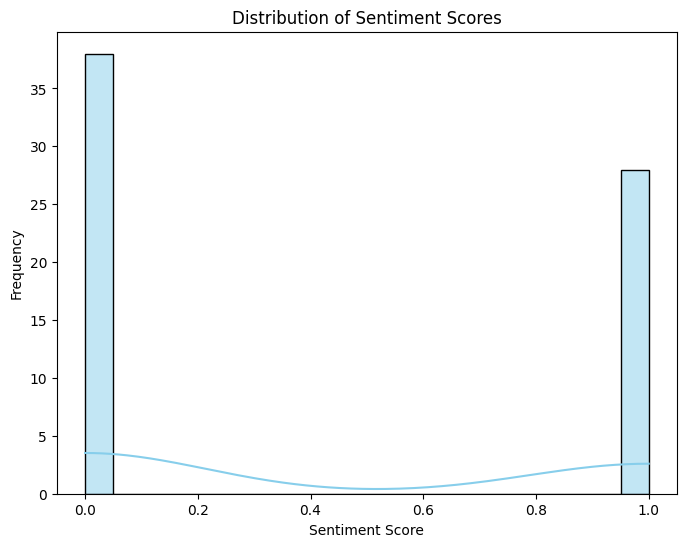

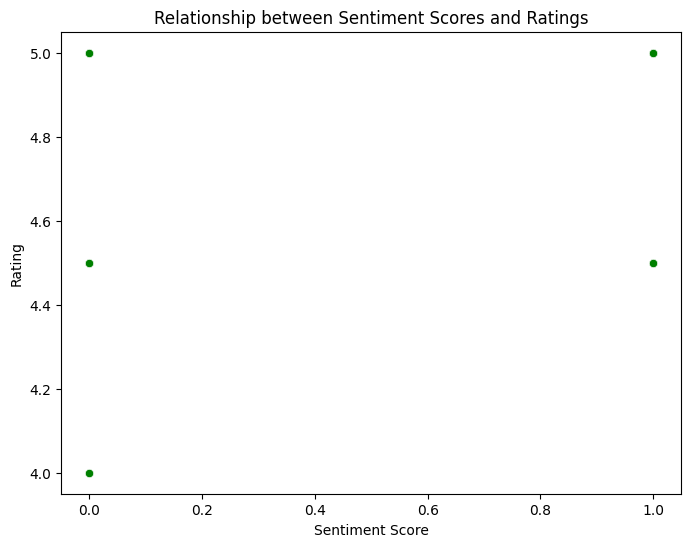

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='rating', data=data, color='green')
plt.title('Relationship between Sentiment Scores and Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()